# Importing requried libraries

In [49]:
import pandas as pd
import numpy as np
import time
import gc
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import cross_val_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [3]:
df = pd.read_csv('bank.csv', delimiter=';')
print(df.head(10))

   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   m

# Q2. Perform the following Exploratory Data Analysis tasks:


# Q2. a. Missing Value Analysis

In [44]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

# data visulization
# histogram


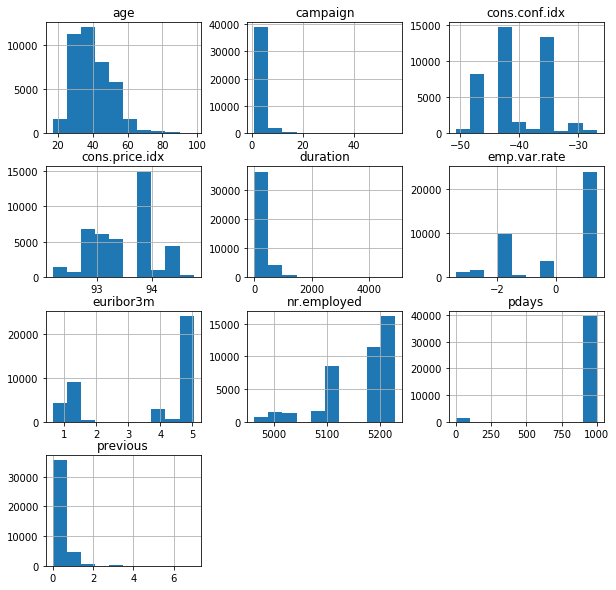

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
df.hist()
plt.show()

In [7]:
# Build correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='rainbow_r')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [8]:
#to understand number of levesin each variables
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# Q2.b. LABEL ENCODING

In [9]:
#importing required lirary
import seaborn as sns
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 


In [10]:
#label encoding
df['y'] = df['y'].astype('category')
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
dtype: object

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df['y'] = df['y'].cat.codes
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [14]:
dummy1 = pd.get_dummies(df['job'])

In [15]:
dfjob = dummy1.drop(['unknown'],axis=1)
dfjob.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [16]:
dummy2 = pd.get_dummies(df['marital'])
maritaldf = dummy2.drop(['unknown'],axis=1)
maritaldf.head()

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [17]:
dummy3 = pd.get_dummies(df['education'])
educationdf = dummy3.drop(['unknown'],axis=1)
educationdf.head()

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [18]:
dummy3.isnull().sum()

basic.4y               0
basic.6y               0
basic.9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
unknown                0
dtype: int64

In [19]:
dummy4 = pd.get_dummies(df['default'])
defaultdf = dummy4.drop(['yes'], axis=1)
defaultdf.head()

,no,unknown
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [20]:
dummy5 = pd.get_dummies(df['housing'])
housingdf = dummy5.drop(['yes'], axis=1)
housingdf.head()

,no,unknown
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


In [21]:
dummy6 = pd.get_dummies(df['loan'])
loandf = dummy6.drop(['yes'], axis=1)
loandf.head()

,no,unknown
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [22]:
df['duration']

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [23]:
dummy8 = pd.get_dummies(df['poutcome'])
poutcomedf = dummy8.drop(['success'], axis=1)
poutcomedf.head()

,failure,nonexistent
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [24]:
merged = pd.concat([df, dfjob, educationdf, defaultdf, loandf, poutcomedf, housingdf, maritaldf],join='outer', axis=1)

In [25]:
merged.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,unknown,no,unknown,failure,nonexistent,no,unknown,divorced,married,single
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,0,1,1,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,1,0,0,1,1,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,1,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1,0,0,1,1,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,1,1,0,0,1,0


In [26]:
data = merged.drop(['marital','job', 'education', 'default', 'loan', 'housing', 'contact', 'month', 'day_of_week', 'poutcome'], axis=1)

In [27]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,unknown,no,unknown,failure,nonexistent,no,unknown,divorced,married,single
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,1,1,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,1,1,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,1,0,0,1,0


In [28]:
data.isnull().sum()

age                    0
duration               0
campaign               0
pdays                  0
previous               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
y                      0
admin.                 0
blue-collar            0
entrepreneur           0
housemaid              0
management             0
retired                0
self-employed          0
services               0
student                0
technician             0
unemployed             0
basic.4y               0
basic.6y               0
basic.9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
no                     0
unknown                0
no                     0
unknown                0
failure                0
nonexistent            0
no                     0
unknown                0
divorced               0
married                0
single                 0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = data.drop(['y'],axis=1)
y = data.y

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=5)

# Q2. C. Feature selection using RANDOM FOREST

In [51]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [52]:
sel.get_support()


array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [54]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

8

In [55]:
print(selected_feat)

Index(['age', 'duration', 'campaign', 'pdays', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


# Q2. d. Standardize the data using the anyone of the scalers provided by sklearn

In [66]:
from sklearn.preprocessing import MinMaxScaler

print(data.columns)
X = df[['pdays', 'duration']]
y = df['y']


# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)
print("Scaled Train Data: \n\n")
print(x_train_norm)

# transform testing dataabs
X_test_norm = norm.transform(x_test)
print("\n\nScaled Test Data: \n\n")
print(X_test_norm)

Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')
Scaled Train Data: 


[[0.19230769 0.15128101 0.01818182 ... 1.         0.         0.        ]
 [0.26923077 0.07645384 0.         ... 0.         1.         0.        ]
 [0.23076923 0.08113054 0.03636364 ... 0.         1.         0.        ]
 ...
 [0.20512821 0.02623017 0.01818182 ... 0.         1.         0.        ]
 [0.24358974 0.15128101 0.12727273 ... 0.         0.         1.        ]
 [0.24358974 0.0199268  0.01818182 ... 0.         1.         0.        ]]


Scaled Test Data: 


[[0.38461538 0.03863359 0.         ... 0.         0.         1.        ]
 [0.51282051 0.0199268  0.         ... 0.         1.         0.        ]
 [0.23076923 0.02582351 0.         ... 0.         1.         0.        ]
 ...
 [0.29487179 0.03192355 0.         ... 

# Q3.BUILDING MODEL LOGISTIC,ADABOOST,KNN,SVC

In [32]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
ada_cv = AdaBoostClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
cv_dict = {0: 'Logistic Regression', 1: 'Ada boost',2:'KNN',3:'SVC'}
cv_models=[logreg_cv,ada_cv,knn_cv,svc_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, x, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.860485300059981
Ada boost Test Accuracy: 0.768515188206703
KNN Test Accuracy: 0.8269293461247178
SVC Test Accuracy: 0.8967169931544798


# Q4.From the test results, we can see high accuracy in  Logistic regression. Let's fit and predict

In [33]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[7085  160]
 [ 629  364]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7245
           1       0.69      0.37      0.48       993

    accuracy                           0.90      8238
   macro avg       0.81      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



# ROC Curve
#Let's check out the performance of our model through ROC curve

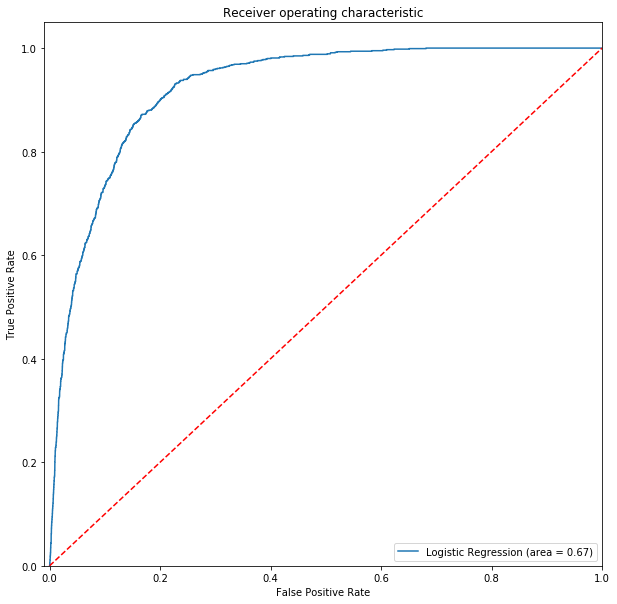

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(x_train,y_train)
y_pred=svc_classifier.predict(x_test)
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8924496236950716
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7245
           1       0.67      0.21      0.32       993

    accuracy                           0.89      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.87      0.89      0.87      8238

